In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/SMS_Dataset/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Processing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data **Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#rename the column name
df.rename(columns = {"v1":"target", "v2":"text"}, inplace = True)

In [ ]:
df.head()
df.shape

(5572, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing value
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check dplicate value
df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicate value
df = df.drop_duplicates(keep = "first")
df.shape

(5169, 2)

# **2. EDA**

In [ ]:
df["target"].value_counts()

,count
target,
0,4516
1,653


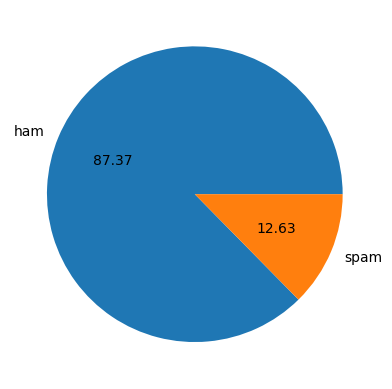

In [ ]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#number of character
df["num_characters"] = df["text"].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words
 # Download the missing resource
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[df["target"] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
df[df["target"] == 1]["num_characters"]

,num_characters
2,155
5,148
8,158
9,154
11,136
...,...
5537,90
5540,160
5547,160
5566,147


<Axes: xlabel='num_characters', ylabel='Count'>

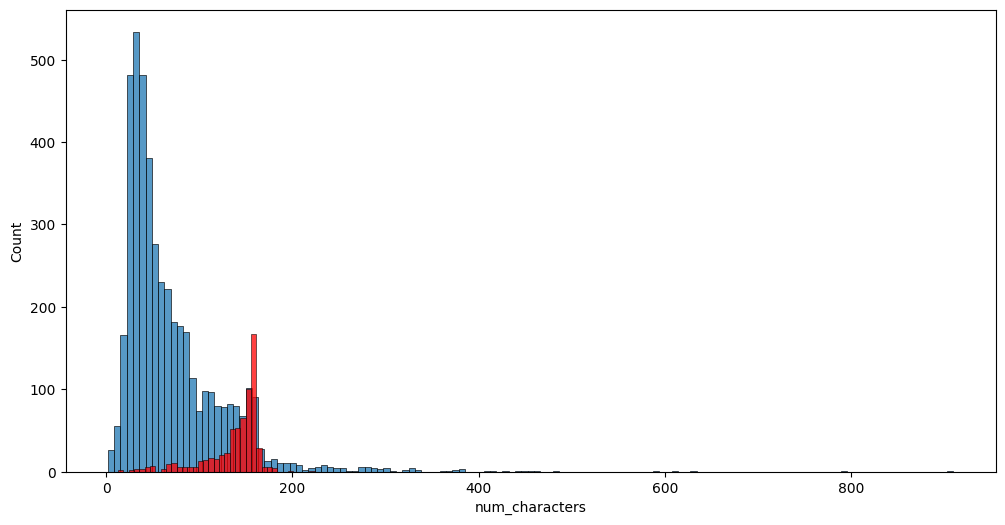

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color = "red")

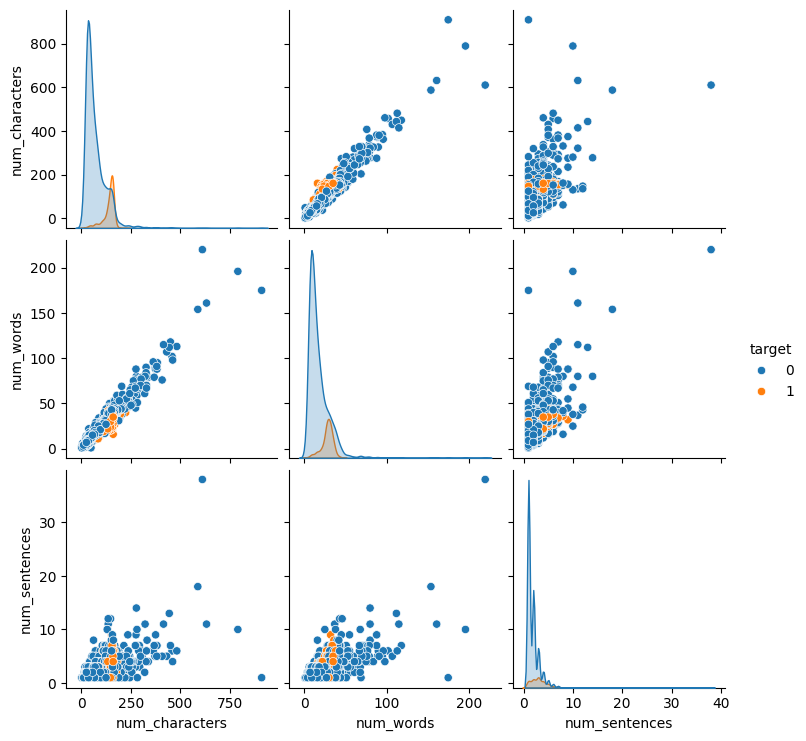

In [ ]:
sns.pairplot(df, hue = "target")

<Axes: >

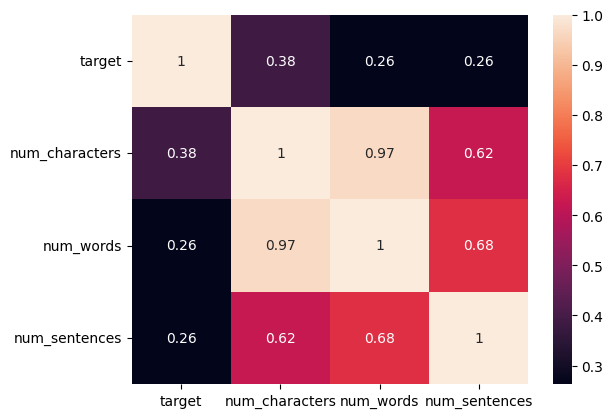

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 3. Data Preprocessing

*   Lower Case,
*   Tokenization,
*   Removing special character
*   Removing stop words and punctuation
*   Stemming



1.   Tokenization means we split sentence into the word
2.   Removing stop words means remove non-sense word like how are you ok no
3.   Stemming means it converts dancers,dancing,dances into the danc






---



In [ ]:
!pip install stopwords

In [ ]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [ ]:
from typing import Text
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

def transformation_text(text):
  ps = PorterStemmer()
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transformation_text("I am a good on earth dancing boy")

'good earth danc boy'

In [ ]:
df["transformed_text"] = df["text"].apply(transformation_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [ ]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

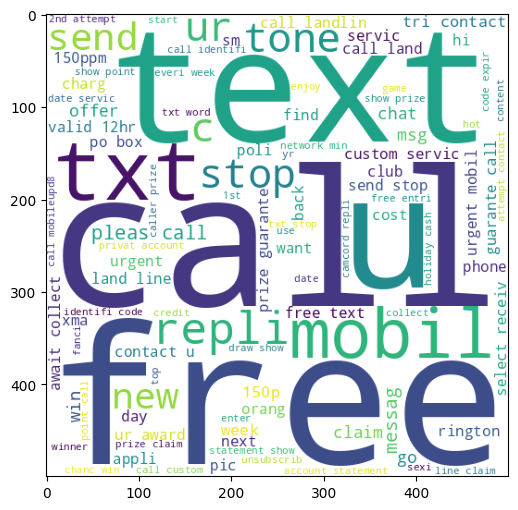

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = ""))

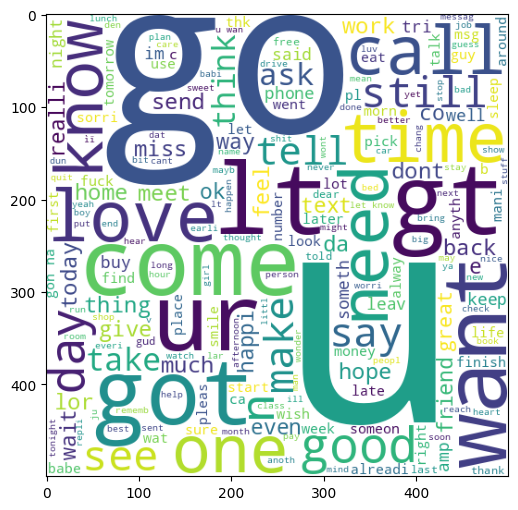

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [ ]:
spam_words = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_words.append(word)

In [ ]:
len(spam_words)

9939

/tmp/ipython-input-3724319094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_spam_words, palette='viridis')


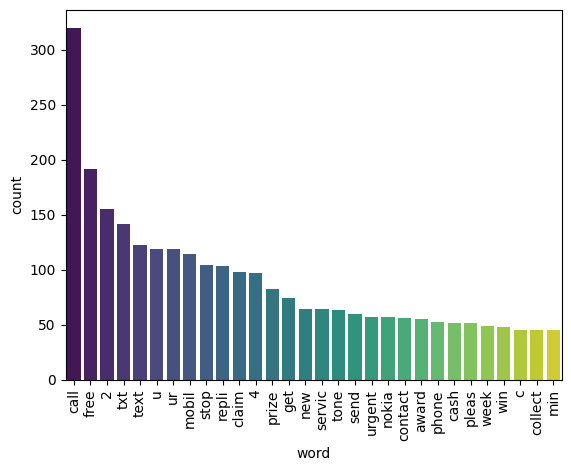

In [ ]:
from collections import Counter
common_spam_words = pd.DataFrame(Counter(spam_words).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=common_spam_words, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_word = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
  for word in msg.split():
    ham_word.append(word)

/tmp/ipython-input-1928465825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=common_ham_words, palette="viridis")


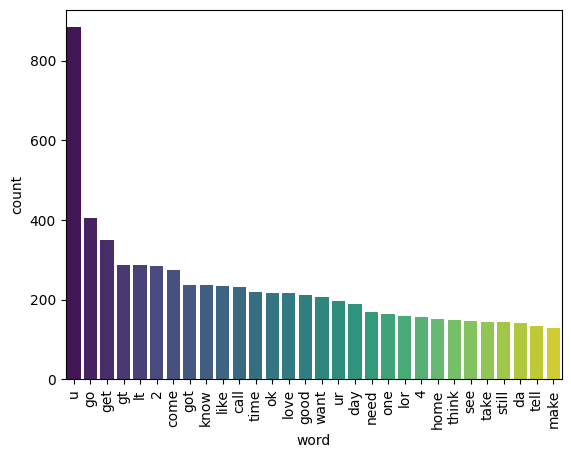

In [ ]:
common_ham_words = pd.DataFrame(Counter(ham_word).most_common(30), columns=["word", "count"])
sns.barplot(x="word", y="count", data=common_ham_words, palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

# 4. Model **Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
y = df['target'].values
X.shape,y.shape

((5169, 3000), (5169,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8626692456479691
[[771 118]
 [ 24 121]]
0.5062761506276151


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy,precision,recall

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9477611940298507, 0.8758620689655172)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9477611940298507
Recall -  0.8758620689655172
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
Recall -  0.33793103448275863
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
Recall -  0.8137931034482758
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8135593220338984
Recall -  0.6620689655172414
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8629032258064516
Recall -  0.7379310344827587
For  RF
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
Recall -  0.8068965517241379
For  AdaBoost
Accuracy -  0.913926499032882
Precision -  0.7916666666666666
Recall -  0.5241379310344828
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8768115942028986
Recall -  0.8344827586206897
For  ETC
Accuracy -  0.9796905222437138
Precision -  1.0
Recall -  0.8551724137931035
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9514563106796117
Recall -  0.6758620689655173
For  xgb
Accuracy -  0.

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, "Recall":recall_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall
1,KN,0.907157,1.000000,0.337931
8,ETC,0.979691,1.000000,0.855172
2,NB,0.972921,0.991597,0.813793
5,RF,0.971954,0.991525,0.806897
9,GBDT,0.949710,0.951456,0.675862
0,SVC,0.975822,0.947761,0.875862
10,xgb,0.968085,0.937500,0.827586
7,BgC,0.960348,0.876812,0.834483
4,LR,0.946809,0.862903,0.737931
3,DT,0.931335,0.813559,0.662069


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,ETC,Accuracy,0.979691
2,NB,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,GBDT,Accuracy,0.949710
5,SVC,Accuracy,0.975822
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.960348
8,LR,Accuracy,0.946809
9,DT,Accuracy,0.931335


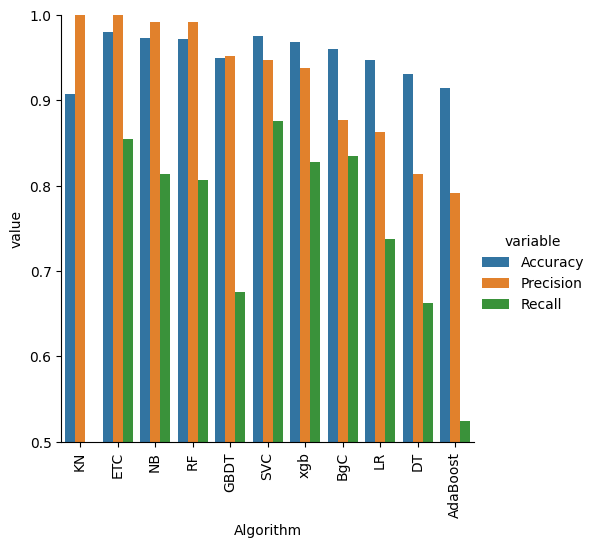

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [64]:
from google.colab import files
files.download('vectorizer.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
model = pickle.load(open('/content/model.pkl','rb'))
tfidf = pickle.load(open('/content/vectorizer.pkl','rb'))

In [83]:
def predict_spam(emails):
  spam_found = False
  for mail in emails:
    clean_mail = transformation_text(mail)

    vector = tfidf.transform([clean_mail])
    print("vector:", vector)
    result = model.predict(vector)[0]
    print("result:", result)

    if result == 1:
      spam_found = True
  if spam_found:
    return "Spam Detected"
  else:
    return "Not Spam"


emails = [
    "I love you"
]

result = predict_spam(emails)
print(result)

vector: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 3000)>
  Coords	Values
  (0, 1622)	1.0
result: 0
Not Spam
